In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.filterwarnings("ignore")

In [5]:
train = pd.read_csv("Train-Set.csv", index_col=0)
train.head()


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
56963,31963,47,blue-collar,married,basic.9y,no,NaN,no,yes,cellular,apr,fri,583,2,999,1,failure,no
31753,21378,48,management,divorced,tertiary,no,351.0,yes,no,cellular,7,apr,725,3,-1,0,unknown,no
60854,17084,38,technician,single,high.school,no,NaN,no,no,cellular,aug,wed,74,2,999,0,nonexistent,no
34207,81693,50,management,divorced,tertiary,no,1270.0,yes,no,cellular,4,may,24,3,-1,0,unknown,no
73066,63978,54,self-employed,married,high.school,no,NaN,yes,yes,cellular,aug,thu,904,3,999,0,nonexistent,yes


In [6]:
test = pd.read_csv("Test-Set.csv", index_col=0)
test.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
45247,74249,34,admin.,married,university.degree,no,NaN,no,no,cellular,jul,wed,266,1,999,0,nonexistent
19894,35779,31,management,single,tertiary,no,165.0,no,yes,cellular,8,aug,523,2,-1,0,unknown
70048,66769,28,blue-collar,single,basic.9y,no,NaN,no,no,telephone,may,fri,489,2,999,0,nonexistent
24241,27888,57,admin.,divorced,secondary,no,1878.0,yes,no,cellular,17,nov,219,1,-1,0,unknown
20495,63306,55,management,divorced,tertiary,no,277.0,no,no,cellular,12,aug,101,3,-1,0,unknown


In [7]:
train.drop('id',axis=1,inplace=True)

In [8]:
train.shape

(54712, 17)

# Data Wrangling

## Education:

1- Primary Education: Ages 6 to 12

2-Secondary Education:

    -Middle School or Junior High School: Ages 12 to 15.
    -High School: Ages 15 to 18.

3-Tertiary Education:

    -College or University: Ages 18 and above.

In [9]:
train.loc[train['education'] == 'professional.course', 'education'] = 'tertiary'
train.loc[train['education'] == 'basic.6y', 'education'] = 'secondary'
train.loc[train['education'] == 'basic.9y', 'education'] = 'secondary'
train.loc[train['education'] == 'basic.4y', 'education'] = 'primary'
train.loc[train['education'] == 'high.school', 'education'] = 'secondary'
train.loc[train['education'] == 'university.degree', 'education'] = 'tertiary'

#################################################################################

test.loc[test['education'] == 'professional.course', 'education'] = 'tertiary'
test.loc[test['education'] == 'basic.6y', 'education'] = 'secondary'
test.loc[test['education'] == 'basic.9y', 'education'] = 'secondary'
test.loc[test['education'] == 'basic.4y', 'education'] = 'primary'
test.loc[test['education'] == 'high.school', 'education'] = 'secondary'
test.loc[test['education'] == 'university.degree', 'education'] = 'tertiary'

In [10]:
train.education.value_counts()

secondary     26335
tertiary      18979
primary        7110
unknown        2276
illiterate       12
Name: education, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

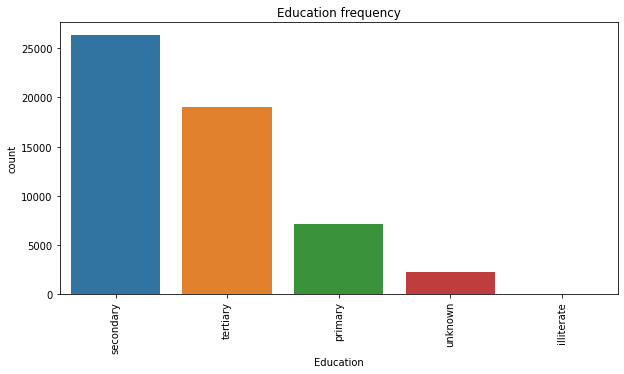

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['education'])
plt.xlabel("Education")
plt.ylabel("count")
plt.title("Education frequency")
plt.xticks(rotation=90)
plt.show

## poutcome

In [12]:
train.loc[train['poutcome'] == 'other', 'poutcome'] = 'unknown'

#########################################################################

test.loc[test['poutcome'] == 'other', 'poutcome'] = 'unknown'

<function matplotlib.pyplot.show(close=None, block=None)>

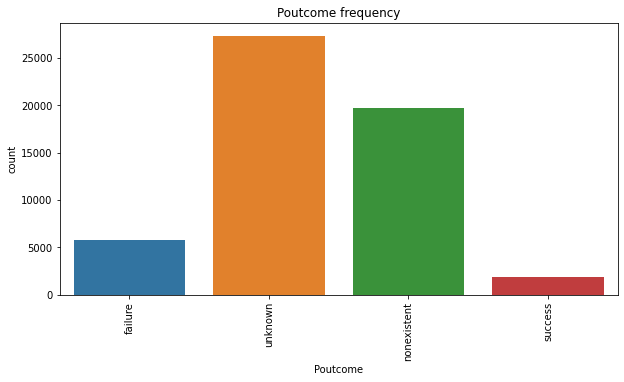

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['poutcome'])
plt.xlabel("Poutcome")
plt.ylabel("count")
plt.title("Poutcome frequency")
plt.xticks(rotation=90)
plt.show

# Missing values:

## Housing & loan:

In [14]:
print("housing values:",train.housing.value_counts())
print("loan values:",train.loan.value_counts())

housing values: yes        29666
no         24503
unknown      543
Name: housing, dtype: int64
loan values: no         45564
yes         8605
unknown      543
Name: loan, dtype: int64


In [15]:
filtered=train.loc[(train['housing']=='unknown') & (train['loan']=='unknown')]
filtered.shape

(543, 17)

**that means the unknown cells in housing is the unknown cells in loan.**

## Feature Engineering:

I do not care about if the customer has housing loan or other I am care about how many loan. so we can make feature engineering between two columns housing and loan as following:

1- if housing = yes and loan= no *or* housing = no and loan= yes *or* housing = yes and loan= unkown *or* housing = unknown and loan= yes  then number of loans are 1.

2- if housing = no and loan= no *or* housing = unknown and loan= no *or* housing = no and loan= unknown then number of loans are 0.

3- if housing = yes and loan= yes then number of loans are 2.

4- if housing = unkown and loan = unknown then number of loans are -1

In [16]:
train.insert(8, 'number_of_loan', 0)
##################################################
test.insert(8, 'number_of_loan', 0)

In [17]:
train.loc[(train['housing'] == 'yes') & (train['loan'] == 'yes'), 'number_of_loan'] = 2
train.loc[(train['housing'] == 'yes') & (train['loan'] == 'no'), 'number_of_loan'] = 1
train.loc[(train['housing'] == 'yes') & (train['loan'] == 'unknown'), 'number_of_loan'] = 1
train.loc[(train['housing'] == 'no') & (train['loan'] == 'yes'), 'number_of_loan'] = 1
train.loc[(train['housing'] == 'no') & (train['loan'] == 'no'), 'number_of_loan'] = 0
train.loc[(train['housing'] == 'no') & (train['loan'] == 'unknown'), 'number_of_loan'] = 0
train.loc[(train['housing'] == 'yes') & (train['loan'] == 'unknown'), 'number_of_loan'] =1
train.loc[(train['housing'] == 'unknown') & (train['loan'] == 'no'), 'number_of_loan'] =0
train.loc[(train['housing'] == 'unknown') & (train['loan'] == 'unknown'), 'number_of_loan'] =-1

##############################################################################################################

test.loc[(test['housing'] == 'yes') & (test['loan'] == 'yes'), 'number_of_loan'] = 2
test.loc[(test['housing'] == 'yes') & (test['loan'] == 'no'), 'number_of_loan'] = 1
test.loc[(test['housing'] == 'yes') & (test['loan'] == 'unknown'), 'number_of_loan'] = 1
test.loc[(test['housing'] == 'no') & (test['loan'] == 'yes'), 'number_of_loan'] = 1
test.loc[(test['housing'] == 'no') & (test['loan'] == 'no'), 'number_of_loan'] = 0
test.loc[(test['housing'] == 'no') & (test['loan'] == 'unknown'), 'number_of_loan'] = 0
test.loc[(test['housing'] == 'yes') & (test['loan'] == 'unknown'), 'number_of_loan'] =1
test.loc[(test['housing'] == 'unknown') & (test['loan'] == 'no'), 'number_of_loan'] =0
test.loc[(test['housing'] == 'unknown') & (test['loan'] == 'unknown'), 'number_of_loan'] =-1

<function matplotlib.pyplot.show(close=None, block=None)>

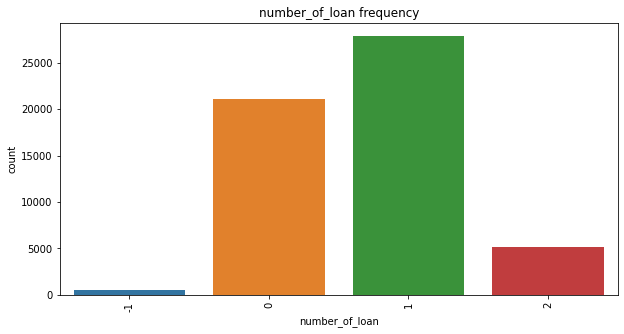

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['number_of_loan'])
plt.xlabel("number_of_loan")
plt.ylabel("count")
plt.title("number_of_loan frequency")
plt.xticks(rotation=90)
plt.show

**what is the relation between number of loan and the balance????**

In [19]:
train.loc[train['number_of_loan']==-1,['balance']]

,balance
73308,NaN
64752,NaN
63907,NaN
51427,NaN
55932,NaN
...,...
71007,NaN
62997,NaN
65323,NaN
58530,NaN


## Day

In [20]:
filtered_train = train[train['day'] == 'apr']
print(filtered_train['month'].value_counts())

thu    417
mon    376
fri    324
wed    178
tue    130
Name: month, dtype: int64


In [21]:
filtered_train = train[train['day'] == 'aug']
print(filtered_train['month'].value_counts())

thu    733
tue    700
wed    679
mon    663
fri    619
Name: month, dtype: int64


In [22]:
filtered_train = train[train['day'] == 'may']
print(filtered_train['month'].value_counts())

wed    1598
fri    1586
tue    1561
mon    1502
thu    1389
Name: month, dtype: int64


In [23]:
filtered_train = train[train['month'] == 'fri']
print(filtered_train['day'].value_counts())

may    1586
jun     653
aug     619
jul     577
nov     428
apr     324
oct      77
sep      70
mar      46
dec      13
Name: day, dtype: int64


In [24]:
filtered_train = train[train['month'] == 'mon']
print(filtered_train['day'].value_counts())

may    1502
jul     853
jun     695
aug     663
nov     415
apr     376
oct      76
mar      70
sep      47
dec      31
Name: day, dtype: int64


In [25]:
day_month_train=pd.DataFrame(train.loc[:,['day','month']])
day_month_test=pd.DataFrame(test.loc[:,['day','month']])

train.loc[train['day'] == 'apr', 'day'] = day_month_train.loc[day_month_train['day'] == 'apr', 'month']
train.loc[train['day'] == 'aug', 'day'] = day_month_train.loc[day_month_train['day'] == 'aug', 'month']
train.loc[train['day'] == 'may', 'day'] = day_month_train.loc[day_month_train['day'] == 'may', 'month']
train.loc[train['day'] == 'nov', 'day'] = day_month_train.loc[day_month_train['day'] == 'nov', 'month']
train.loc[train['day'] == 'dec', 'day'] = day_month_train.loc[day_month_train['day'] == 'dec', 'month']
train.loc[train['day'] == 'sep', 'day'] = day_month_train.loc[day_month_train['day'] == 'sep', 'month']
train.loc[train['day'] == 'jul', 'day'] = day_month_train.loc[day_month_train['day'] == 'jul', 'month']
train.loc[train['day'] == 'mar', 'day'] = day_month_train.loc[day_month_train['day'] == 'mar', 'month']
train.loc[train['day'] == 'jun', 'day'] = day_month_train.loc[day_month_train['day'] == 'jun', 'month']
train.loc[train['day'] == 'oct', 'day'] = day_month_train.loc[day_month_train['day'] == 'oct', 'month']

#########################################################################################################

test.loc[test['day'] == 'apr', 'day'] = day_month_test.loc[day_month_test['day'] == 'apr', 'month']
test.loc[test['day'] == 'aug', 'day'] = day_month_test.loc[day_month_test['day'] == 'aug', 'month']
test.loc[test['day'] == 'may', 'day'] = day_month_test.loc[day_month_test['day'] == 'may', 'month']
test.loc[test['day'] == 'nov', 'day'] = day_month_test.loc[day_month_test['day'] == 'nov', 'month']
test.loc[test['day'] == 'dec', 'day'] = day_month_test.loc[day_month_test['day'] == 'dec', 'month']
test.loc[test['day'] == 'sep', 'day'] = day_month_test.loc[day_month_test['day'] == 'sep', 'month']
test.loc[test['day'] == 'jul', 'day'] = day_month_test.loc[day_month_test['day'] == 'jul', 'month']
test.loc[test['day'] == 'mar', 'day'] = day_month_test.loc[day_month_test['day'] == 'mar', 'month']
test.loc[test['day'] == 'jun', 'day'] = day_month_test.loc[day_month_test['day'] == 'jun', 'month']
test.loc[test['day'] == 'oct', 'day'] = day_month_test.loc[day_month_test['day'] == 'oct', 'month']

<function matplotlib.pyplot.show(close=None, block=None)>

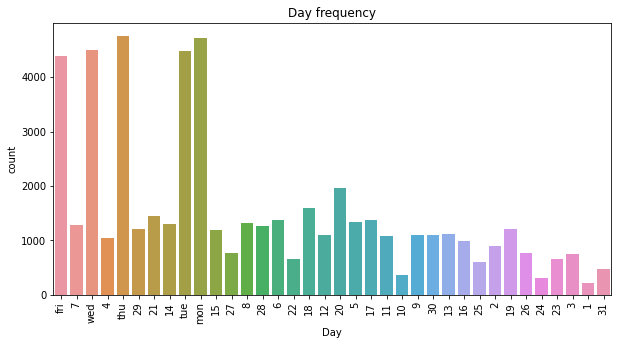

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['day'])
plt.xlabel("Day")
plt.ylabel("count")
plt.title("Day frequency")
plt.xticks(rotation=90)
plt.show

## Month

In [27]:
train.loc[train['month'] == 'fri', 'month'] = day_month_train.loc[day_month_train['month'] == 'fri', 'day']
train.loc[train['month'] == 'wed', 'month'] = day_month_train.loc[day_month_train['month'] == 'wed', 'day']
train.loc[train['month'] == 'tue', 'month'] = day_month_train.loc[day_month_train['month'] == 'tue', 'day']
train.loc[train['month'] == 'mon', 'month'] = day_month_train.loc[day_month_train['month'] == 'mon', 'day']
train.loc[train['month'] == 'thu', 'month'] = day_month_train.loc[day_month_train['month'] == 'thu', 'day']


#########################################################################################################

test.loc[test['month'] == 'fri', 'month'] = day_month_test.loc[day_month_test['month'] == 'fri', 'day']
test.loc[test['month'] == 'wed', 'month'] = day_month_test.loc[day_month_test['month'] == 'wed', 'day']
test.loc[test['month'] == 'tue', 'month'] = day_month_test.loc[day_month_test['month'] == 'tue', 'day']
test.loc[test['month'] == 'mon', 'month'] = day_month_test.loc[day_month_test['month'] == 'mon', 'day']
test.loc[test['month'] == 'thu', 'month'] = day_month_test.loc[day_month_test['month'] == 'thu', 'day']


<function matplotlib.pyplot.show(close=None, block=None)>

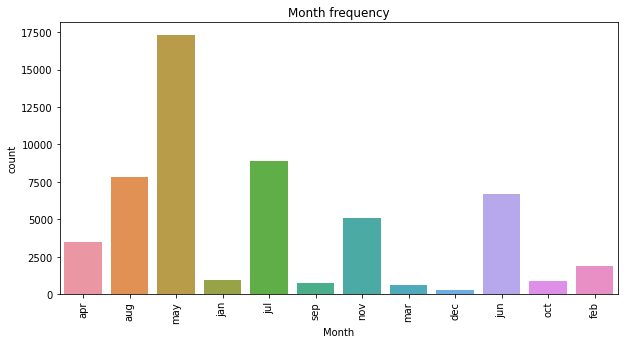

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['month'])
plt.xlabel("Month")
plt.ylabel("count")
plt.title("Month frequency")
plt.xticks(rotation=90)
plt.show

## balance

use KNNImputer to fill nan values in balance column.

In [29]:
from sklearn.impute import KNNImputer

train_imputed = train.copy()
train_imputed.drop('Target', axis=1, inplace=True)

# Initialize the KNNImputer with the number of neighbors (k) you want to consider.
# The default value of k is 5.
knn_imputer = KNNImputer(n_neighbors=5)

# Impute the missing 'balance' values
train_imputed['balance'] = knn_imputer.fit_transform(train[['balance']])

# The KNNImputer returns an array, so we need to convert it back to a DataFrame
# and assign the imputed values to the 'balance' column in the original DataFrame.
train_imputed = pd.DataFrame(train_imputed, columns=train.columns)

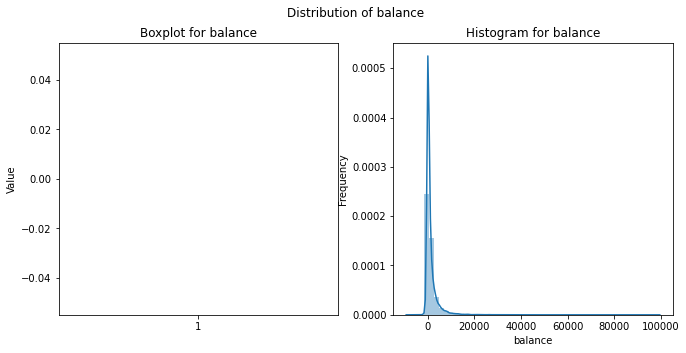

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

ax1.boxplot(x=train['balance'])
ax1.set_title('Boxplot for balance')

sns.distplot(train['balance'])
ax2.set_title('Histogram for balance')

# Add labels and titles
fig.suptitle('Distribution of balance')
ax1.set_ylabel('Value')
ax2.set_ylabel('Frequency')
plt.show()

<AxesSubplot: xlabel='balance'>

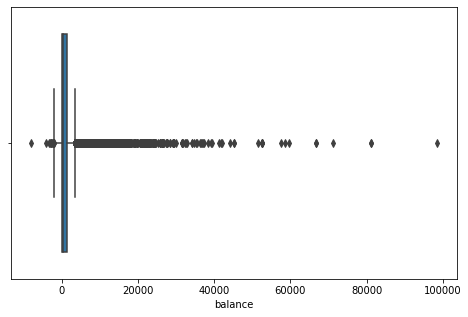

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=train.balance)

Text(0.5, 1.0, 'Distribution of the balance based on the target')

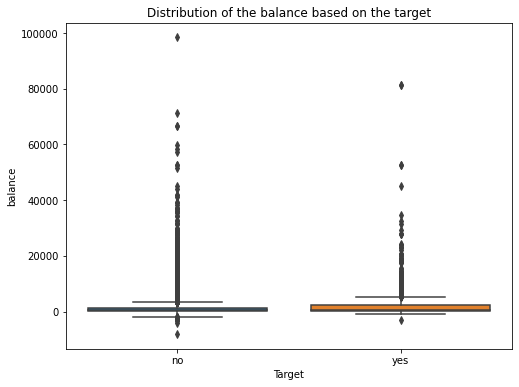

In [32]:
a4_dims = (8,6)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.boxplot(data=train, y="balance", x="Target")
ax.set_title("Distribution of the balance based on the target")